# COVID-19 Hospital 104 Data

## Dataset 

In [80]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
%matplotlib inline 

In [81]:
xls = pd.ExcelFile('../input/Hospital104.xlsx')
df = pd.read_excel(xls, 'Batch2_Data')

In [82]:
df

,Sample No.,Patient ID,Study ID,Age,Gender,BMI,Symptoms Presented,Symptoms Present?,Fever,Cough,...,ERYTHROCYTE SEDIMENTATION RATE,PRO-CALCITONIN,D-DIMER,IL-6,SERUM FERRITIN,ECG,CXR,CORADS SCORE ON HRCT,PATIENT CATEGORY,PLASMA THERAPY
0,1013,IGIB1040201013,IGIB1040201013-1,53,1,22.5,"fever, cough,breathlessness",1,1,1,...,8.0,NaN,98,NaN,NaN,sinus rhythm,normal,4,5a,No
1,1014,IGIB1040201014,IGIB1040201014-1,26,0,25.7,asymptomatic,0,0,0,...,NaN,NaN,0.2,NaN,NaN,sinus rhythm,normal,0,5b,No
2,1015,IGIB1040201015,IGIB1040201015-1,28,1,22.2,asymptomatic,0,0,0,...,4.0,0.20,0.35,NaN,NaN,sinus rhythm,normal,0,5b,No
3,1016,IGIB1040201016,IGIB1040201016-1,73,1,21.5,"fever, cough,breathlessness",1,1,1,...,NaN,NaN,NaN,63.31,NaN,sinus rhythm,normal,5,4,No
4,1060,IGIB1040201060,IGIB1040201060-1,49,1,27.4,"fever,cough",1,1,1,...,8.0,NaN,350.55,4.33,NaN,sinus rhythm,normal,5,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,950,IGIB104020950,IGIB104020950-1,53,1,27.2,"fever, cough,breathlessness",1,1,1,...,14.0,NaN,410,NaN,NaN,sinus rhythm,normal,5,4,No
186,965,IGIB104020965,IGIB104020965-1,33,1,26.0,"fever, cough,breathlessness",1,1,1,...,6.0,NaN,1120,37.90,NaN,sinus tachycardia,normal,5,4,No
187,9667,IGIB1040209667,IGIB1040209667-1,70,1,21.4,"fever, breathlessness",1,1,0,...,8.0,0.54,1078,735.60,NaN,sinus rhythm,normal,5,4,No
188,9759,IGIB1040209759,IGIB1040209759-1,65,0,22.4,breathlessness and cough,1,0,1,...,6.0,NaN,1224,NaN,NaN,sinus rhythm,normal,6,4,No


In [83]:
df.describe()

,Sample No.,Age,Gender,BMI,Symptoms Present?,Fever,Cough,Breathlessness,Travel History,Temp,...,SGPT,TOTAL PROTEINS,ALBUMIN,ALKALINE PHOSPHATASE,LACTATE DEHYDROGENASE4,C-REACTIVE PROTEINS,ERYTHROCYTE SEDIMENTATION RATE,PRO-CALCITONIN,IL-6,SERUM FERRITIN
count,190.000000,190.000000,190.000000,187.000000,190.000000,190.000000,190.000000,190.000000,190.000000,188.000000,...,179.000000,179.000000,179.000000,179.000000,100.000000,179.000000,91.000000,50.000000,46.000000,64.000000
mean,4688.400000,47.368421,0.615789,23.086845,0.831579,0.500000,0.415789,0.394737,0.021053,98.243617,...,43.379888,6.334078,3.558101,81.163687,527.018000,43.795922,10.797802,1.470000,413.586522,388.139844
std,2650.665385,18.375307,0.487693,1.607635,0.375229,0.501321,0.494160,0.490085,0.143939,1.252596,...,37.229672,0.764457,0.493188,41.536575,470.750464,60.978641,6.490916,2.680938,1064.095040,504.435650
min,246.000000,5.000000,0.000000,18.700000,0.000000,0.000000,0.000000,0.000000,0.000000,95.700000,...,3.800000,3.600000,2.600000,3.800000,16.800000,0.100000,2.000000,0.010000,0.800000,21.000000
25%,1603.500000,34.000000,0.000000,22.100000,1.000000,0.000000,0.000000,0.000000,0.000000,97.300000,...,20.950000,5.900000,3.200000,55.900000,262.750000,1.835000,6.000000,0.060000,6.475000,112.602500
50%,6258.000000,46.500000,1.000000,22.800000,1.000000,0.500000,0.000000,0.000000,0.000000,98.150000,...,31.200000,6.400000,3.500000,68.000000,451.650000,12.000000,8.000000,0.395000,31.430000,236.900000
75%,6687.750000,60.000000,1.000000,24.100000,1.000000,1.000000,1.000000,1.000000,0.000000,98.925000,...,48.700000,6.700000,3.800000,96.200000,668.250000,66.565000,14.000000,0.900000,260.990000,397.045000
max,9766.000000,92.000000,1.000000,27.400000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000,...,190.000000,12.600000,6.600000,320.900000,3250.000000,381.000000,26.000000,12.540000,4967.800000,2378.900000


### Important Functions

In [84]:
#Finding missing data
def missing_data(data):
    missing = data.isnull()
    for column in missing.columns.values.tolist():
        print(column)
        print (missing[column].value_counts())
        print("")
        
def plot_count(new_column_name,old_column,groups,group_names):
    df[new_column_name] = pd.cut(df[old_column], groups, labels=group_names, include_lowest=True )
    sns.countplot(df[new_column_name])
    return df
    
def contingency(data,column):
    grouped = data.groupby([column,'Outcome'],as_index=False).size()
    grouped_pivot = grouped.pivot(index=column,columns='Outcome')
    return grouped_pivot  

### Missing Data

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [85]:
missing_data(df)

Sample No.
False    190
Name: Sample No., dtype: int64

Patient ID
False    190
Name: Patient ID, dtype: int64

Study ID
False    190
Name: Study ID, dtype: int64

Age
False    190
Name: Age, dtype: int64

Gender
False    190
Name: Gender, dtype: int64

BMI
False    187
True       3
Name: BMI, dtype: int64

Symptoms Presented
False    190
Name: Symptoms Presented, dtype: int64

Symptoms Present?
False    190
Name: Symptoms Present?, dtype: int64

Fever
False    190
Name: Fever, dtype: int64

Cough
False    190
Name: Cough, dtype: int64

Breathlessness
False    190
Name: Breathlessness, dtype: int64

Travel History
False    190
Name: Travel History, dtype: int64

Temp
False    188
True       2
Name: Temp, dtype: int64

SPO2
False    187
True       3
Name: SPO2, dtype: int64

Medicine Administered
False    189
True       1
Name: Medicine Administered, dtype: int64

Contact to NCOVID Patient
False    190
Name: Contact to NCOVID Patient, dtype: int64

Co-morbid Condition
False    189
True 

Outcome is an important parameter for us to measure. We observe that outcome is heavily correlated to ventilatory support sequired, shown below.

In [86]:
df['Outcome'] = pd.to_numeric(df.Outcome, errors='coerce')
c_vent = contingency(df,'Ventilatory support required')
c_vent

size     
Outcome                         0.0  1.0
Ventilatory support required            
0.0                           116.0  1.0
1.0                             1.0  6.0
2.0                             NaN  9.0

In [87]:
df[['Outcome','Ventilatory support required']].corr()

,Outcome,Ventilatory support required
Outcome,1.000000,0.904134
Ventilatory support required,0.904134,1.000000


According to the table above, it would be okay to replace the null values of Outcome as 0 if no ventilatory support was needed, and 1 if ventilatory support severity is 1 (Non-invasive ventilation) or 2 (Intubation).

In [88]:
df['Outcome'].fillna(df['Ventilatory support required'], inplace=True)
df['Outcome'].replace(2,1, inplace=True)
df['Outcome'].value_counts()

0.0    158
1.0     29
Name: Outcome, dtype: int64

## Initial Factors and Vital Signs

Let us take a close look at the initial signs of disease that set in. How much information can we gauge about the patient just when he/she is admitted? Or, can we know the risk level associated with the patient by doing some simple tests at home?

### Features
In this section, we will analyse the following features to gain some idea about how these initial factors and vital signs play a role in the disease onset and severity. We will use the Ventilatory Support to categorize the severity of the disease.

Initial Factors
- Age
- Gender
- BMI
- Contact to N-Covid Person
- Travel history

Vital Signs
- Temperature
- SPO2
- Respiratory Rate
- Random Blood Sugar

These values should be readily available for any patient, and can help in making important decisions regarding the severity of the disease. I believe we can predict if the patient will require ventilatory support or not, which is directly correlated to the outcome of the disease, as shown below.

### Dealing With Missing Values

- BMI, Temperature, Random Blood Sugar: We will replace these values with the mean values.

- Respiratory Rate and SPO2: Some are unavailable, we will drop these rows, since even their ventilatory support data is not available.

In [90]:


#dropping unnecessary columns
df.drop(inplace=True,columns=['Respiratory Support','Ventilatory support required','LACTATE DEHYDROGENASE4','O2 supplementation required','Sample No.','Patient ID','Study ID','Medicine Administered','Symptoms Presented','Co-morbid Condition','Hospital stay in days','RESPIRATORY FINDINGS','ERYTHROCYTE SEDIMENTATION RATE','PRO-CALCITONIN','D-DIMER','IL-6','SERUM FERRITIN','ECG','CXR','CORADS SCORE ON HRCT','PATIENT CATEGORY','PLASMA THERAPY'])

#dropping NA values
df.dropna(subset=['Temp','BMI','HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS'],axis=0,inplace=True)
df.to_csv("unnormalized.csv")
df

,Age,Gender,BMI,Symptoms Present?,Fever,Cough,Breathlessness,Travel History,Temp,SPO2,...,POTASSIUM,CHLORIDE,TOTAL BILIRUBIN,DIRECT BILIRUBIN,SGOT,SGPT,TOTAL PROTEINS,ALBUMIN,ALKALINE PHOSPHATASE,C-REACTIVE PROTEINS
0,53,1,22.5,1,1,1,1,0,96.8,99.0,...,4.8,108.0,0.5,0.2,81.3,70.0,5.9,3.8,44.1,58.10
1,26,0,25.7,0,0,0,0,0,98.7,98.0,...,4.1,108.0,0.3,0.1,22.2,14.8,6.6,3.9,58.5,3.66
2,28,1,22.2,0,0,0,0,0,98.4,98.0,...,18.1,1.1,0.8,0.3,19.3,12.8,7.0,4.2,86.0,10.17
3,73,1,21.5,1,1,1,1,0,98.0,98.0,...,4.2,104.0,2.4,1.2,59.0,47.9,6.3,3.7,120.0,168.90
4,49,1,27.4,1,1,1,0,0,101.0,98.0,...,3.8,92.0,4.2,2.1,44.6,55.5,5.9,3.1,177.0,164.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,53,1,27.2,1,1,1,1,0,98.9,96.0,...,2.9,97.0,1.4,0.5,43.8,38.8,6.2,3.7,73.3,127.60
186,33,1,26.0,1,1,1,1,0,99.3,98.0,...,4.2,106.0,0.5,0.2,80.6,42.6,6.6,3.8,57.4,138.15
187,70,1,21.4,1,1,0,1,0,98.3,99.0,...,4.2,106.0,1.8,0.6,77.0,27.9,5.9,3.3,60.1,143.00
188,65,0,22.4,1,0,1,1,0,98.9,97.0,...,3.8,110.0,1.2,0.6,56.2,43.2,5.6,3.4,216.0,124.00


In [91]:
missing_data(df)

Age
False    175
Name: Age, dtype: int64

Gender
False    175
Name: Gender, dtype: int64

BMI
False    175
Name: BMI, dtype: int64

Symptoms Present?
False    175
Name: Symptoms Present?, dtype: int64

Fever
False    175
Name: Fever, dtype: int64

Cough
False    175
Name: Cough, dtype: int64

Breathlessness
False    175
Name: Breathlessness, dtype: int64

Travel History
False    175
Name: Travel History, dtype: int64

Temp
False    175
Name: Temp, dtype: int64

SPO2
False    175
Name: SPO2, dtype: int64

Contact to NCOVID Patient
False    175
Name: Contact to NCOVID Patient, dtype: int64

Co-morbidity?
False    175
Name: Co-morbidity?, dtype: int64

Diabetes
False    175
Name: Diabetes, dtype: int64

Hypertension
False    175
Name: Hypertension, dtype: int64

Heart Condition
False    175
Name: Heart Condition, dtype: int64

Respiratory rate(breaths per minute)
False    175
Name: Respiratory rate(breaths per minute), dtype: int64

Outcome
False    175
Name: Outcome, dtype: int64

qSOFA 

### Normalizing Data


<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1. Here we will use min-max normalization for the BMI and temperature data.

### Examining different features

#### Age

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

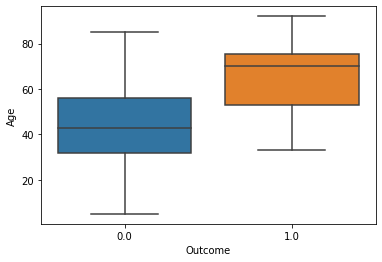

In [12]:
sns.boxplot(x="Outcome", y="Age", data=df)

In [13]:
scipy.stats.pointbiserialr(df['Outcome'],df['Age'])

PointbiserialrResult(correlation=0.39833615210065176, pvalue=4.7781606808729274e-08)

From the box plot, we can see that fatal outcome is more prominent in people aged over 60. Let us look at this in more detail by dividing people into 2 age groups, above and below 60.

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


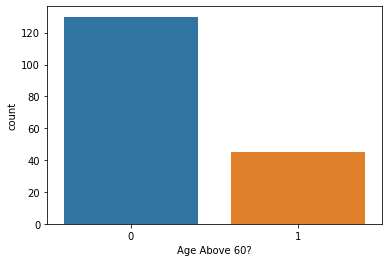

In [14]:
age_groups = [0,59,100]
group_names = [0,1]
df = plot_count('Age Above 60?','Age',age_groups,group_names)

In [15]:
age = df[['Age Above 60?','Outcome']]
c_age = contingency(age,'Age Above 60?')
c_age

size    
Outcome        0.0 1.0
Age Above 60?         
0              122   8
1               29  16

##### Chi-Squared Test on Age Groups

In [16]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_age), correction=False)
chi2, p

(24.4202939567178, 7.744853566276959e-07)

p value <<< 0.5 thus there is a strong correlation between the outcome of the patient and if he/she is above 60 or not. 

#### Gender

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

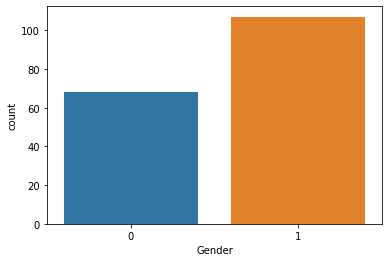

In [17]:
sns.countplot(df['Gender'])

In [18]:
df_gender = df[['Gender','Outcome']]
c_gender = contingency(df_gender,'Gender')
c_gender

size    
Outcome  0.0 1.0
Gender          
0         62   6
1         89  18

##### Fisher's exact test for gender dependency on the outcome

In [19]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(c_gender))
pvalue

0.17696470292467287

Since the p-value < 5%, we can conclude that there is some dependency of gender on the final outcome.

#### Outcome probability based on age group + gender

In [20]:
age_gender = df[['Age Above 60?','Gender','Outcome']]
basics = age_gender.query("Outcome == 1").groupby(['Age Above 60?','Gender'],as_index=False).size()
basics_pivot = basics.pivot(index='Gender',columns='Age Above 60?')
basics_pivot

size    
Age Above 60?    0   1
Gender                
0                1   5
1                7  11

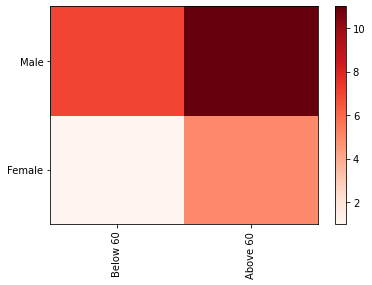

In [21]:
%matplotlib inline
plt.figure
fig, ax = plt.subplots()
im = ax.pcolor(basics_pivot, cmap='Reds')

#label names
row_labels = ['Below 60','Above 60']
col_labels = ['Female','Male']

#move ticks and labels to the center
ax.set_xticks(np.arange(basics_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(basics_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)

plt.savefig('agegender.png')
plt.show()

From the analysis above, we can see clearly that covid-affected males above the age of 60 are at the highest risk of mortality from the disease.

#### BMI

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

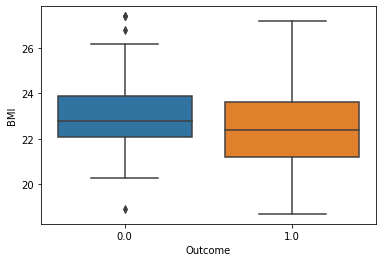

In [22]:
sns.boxplot(x="Outcome", y="BMI", data=df)

It doesn't look like we can get much information with BMI data for the patient, since it is quite evenly distributed. Thus, we will not use this as one of our features.

In [23]:
scipy.stats.pointbiserialr(df['Outcome'],df['BMI'])

PointbiserialrResult(correlation=-0.07374797856613517, pvalue=0.3320843629129756)

#### Temperature

<AxesSubplot:xlabel='Outcome', ylabel='Temp'>

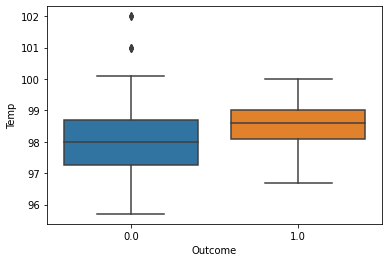

In [24]:
sns.boxplot(x="Outcome", y="Temp", data=df)

In [25]:
scipy.stats.pointbiserialr(df['Outcome'],df['Temp'])

PointbiserialrResult(correlation=0.10060722042618699, pvalue=0.18525930288487297)

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


size    
Outcome      0.0 1.0
Temp Groups         
0.2           27   1
0.4           55   7
0.6           43  13
0.8           19   3
1.0            7   0

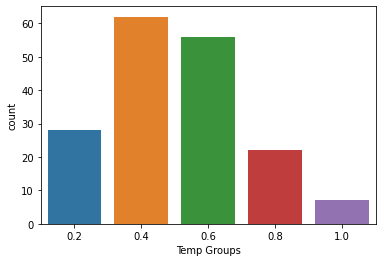

In [26]:
df['Temp']=df['Temp'].round(1)

temp_groups = np.linspace(df['Temp'].min(),df['Temp'].max(),6)
group_names = [0.2,0.4,0.6,0.8,1]
plot_count('Temp Groups','Temp',temp_groups,group_names)

df_temp = df[['Temp Groups','Outcome']]
c_temp = contingency(df_temp,'Temp Groups')
c_temp

#### Contact to NCOVID Patient

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Contact to NCOVID Patient', ylabel='count'>

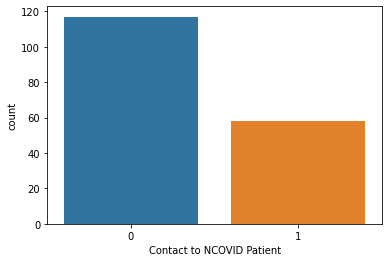

In [27]:
sns.countplot(df["Contact to NCOVID Patient"])

In [28]:
df_contact = df[['Contact to NCOVID Patient','Outcome']]
c_contact = contingency(df_contact,'Contact to NCOVID Patient')
c_contact

size    
Outcome                    0.0 1.0
Contact to NCOVID Patient         
0                          101  16
1                           50   8

In [29]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_contact), correction=False)
chi2, p

(0.0004554240681210219, 0.9829739036401135)

The p-value in the chi2 test is > 0.5 and so, this is mostly an independent feature from outcome. We will not use this.

#### Travel History

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Travel History', ylabel='count'>

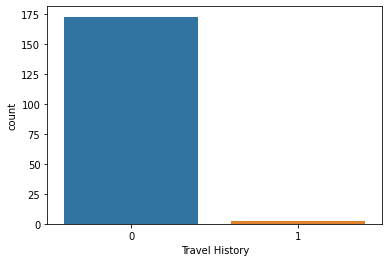

In [30]:
sns.countplot(df["Travel History"])

In [31]:
df_travel = df[['Travel History','Outcome']]
c_travel = contingency(df_travel,'Travel History')
c_travel

size    
Outcome         0.0 1.0
Travel History         
0               150  23
1                 1   1

In [32]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(c_travel))
pvalue

0.2561576354680348

The p-value in the Fisher exact test is > 0.5 and so, this is mostly an independent feature from outcome. We will not use this.

#### SPO2

<AxesSubplot:xlabel='Outcome', ylabel='SPO2'>

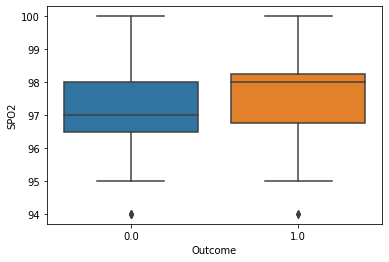

In [33]:
sns.boxplot(x="Outcome", y="SPO2", data=df)

It doesn't look like we can get much information with SPO2 data for the patient, since it is quite evenly distributed. Thus, we will not use this as one of our features.

In [34]:
scipy.stats.pointbiserialr(df['Outcome'],df['SPO2'])

PointbiserialrResult(correlation=0.02193402082005994, pvalue=0.7732586527514697)

#### Respiratory Rate
(description)

<AxesSubplot:xlabel='Outcome', ylabel='Respiratory rate(breaths per minute)'>

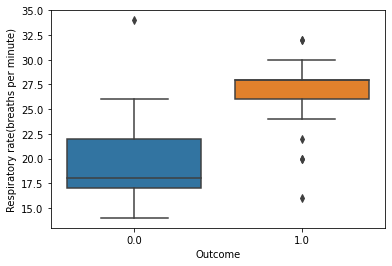

In [35]:
sns.boxplot(x="Outcome", y="Respiratory rate(breaths per minute)", data=df)

In [36]:
scipy.stats.pointbiserialr(df['Outcome'],df['Respiratory rate(breaths per minute)'])

PointbiserialrResult(correlation=0.5869220116653181, pvalue=1.3929567217170963e-17)

This seems like a good indicator for our the outcome. Let us consider it.

#### Random Blood Sugar
(description)

<AxesSubplot:xlabel='Outcome', ylabel='RANDOM BLOOD SUGAR'>

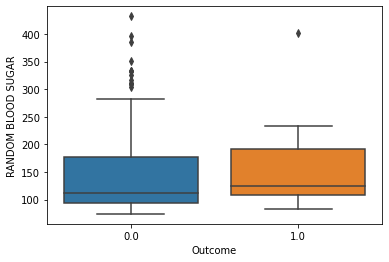

In [37]:
sns.boxplot(x="Outcome", y="RANDOM BLOOD SUGAR", data=df)

In [38]:
scipy.stats.pointbiserialr(df['Outcome'],df['RANDOM BLOOD SUGAR'])

PointbiserialrResult(correlation=0.03365631099507599, pvalue=0.6583692841505597)

It doesn't look like we can get much information with blood sugar data for the patient, since it is quite evenly distributed. Thus, we will not use this as one of our features.

### Symptoms

With relation to symptoms, there are a few questions we can answer with the data we have.
1. How are these symptoms related to each other? And to the initial factors?
2. How will the symptoms affect the vital signs of the patient?
3. Which symptom is the strongest indicator of severity of the disease?
4. Which medications are most effective to treat these symptoms?
5. Do asymptomatic patients have a better response?

We have three major symptoms in the data - fever, cough and breathlessness. Let us examine them.

In [39]:
symptoms = df[['Fever','Breathlessness','Cough','Outcome']]

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Symptoms Present?', ylabel='count'>

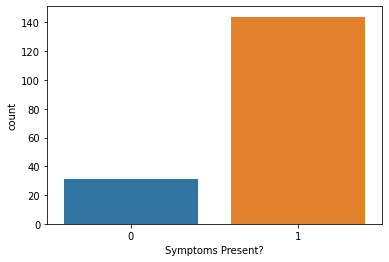

In [40]:
sns.countplot(df['Symptoms Present?'])

In [41]:
df_symptoms = df[['Symptoms Present?','Outcome']]
c_symptoms = contingency(df_symptoms,'Symptoms Present?')
c_symptoms

size      
Outcome              0.0   1.0
Symptoms Present?             
0                   31.0   NaN
1                  120.0  24.0

From this, we can see that asymptomatic patients do not die. This can be a strong indicator in our model.

#### Fever
(description)

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fever', ylabel='count'>

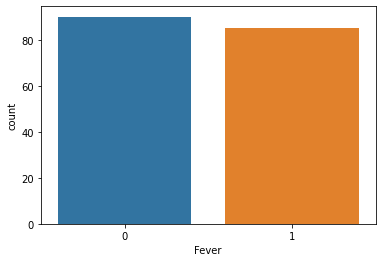

In [42]:
sns.countplot(df['Fever'])

In [43]:
df_fever = df[['Fever','Outcome']]
c_fever = contingency(df_fever,'Fever')
c_fever

size    
Outcome  0.0 1.0
Fever           
0         78  12
1         73  12

##### Chi-sqaured test for fever dependency on the outcome

In [44]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_fever))
chi2, p

(0.004773685596387175, 0.9449164975708932)

Since the p-value > 5%, we can conclude that there is no dependency of only fever on the final outcome.

#### Cough
(description)

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cough', ylabel='count'>

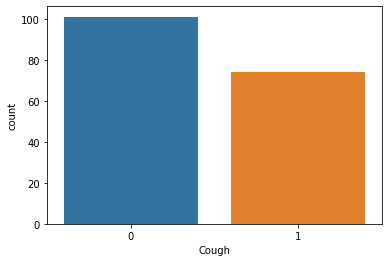

In [45]:
sns.countplot(df['Cough'])

In [46]:
df_cough = df[['Cough','Outcome']]
c_cough = contingency(df_cough,'Cough')
c_cough

size    
Outcome  0.0 1.0
Cough           
0         95   6
1         56  18

##### Chi-squared exact test for cough dependency on the outcome

In [47]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_cough))
chi2, p

(10.693413168225273, 0.0010751765614080667)

Since the p-value << 5%, we can conclude that there is a strong dependency of cough on the final outcome.

#### Breathlessness
(description)

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Breathlessness', ylabel='count'>

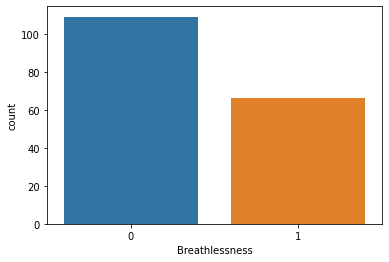

In [48]:
sns.countplot(df['Breathlessness'])

In [49]:
df_Breathlessness = df[['Breathlessness','Outcome']]
c_breath = contingency(df_Breathlessness,'Breathlessness')
c_breath

size    
Outcome         0.0 1.0
Breathlessness         
0               107   2
1                44  22

##### Fisher's exact test for breathlessness dependency on the outcome

In [50]:
oddsratio, pvalue = scipy.stats.fisher_exact(np.array(c_breath))
pvalue

5.288446720827448e-09

Since the p-value <<< 5%, we can conclude that breathlessness is the strongest indicator of the final outcome.

In [51]:
grouped_symptoms = symptoms.groupby(['Fever','Cough','Breathlessness'],as_index=False).mean().round(2)
grouped_symptoms

,Fever,Cough,Breathlessness,Outcome
0,0,0,0,0.00
1,0,0,1,0.23
2,0,1,0,0.00
3,0,1,1,0.32
4,1,0,0,0.00
5,1,0,1,0.30
6,1,1,0,0.09
7,1,1,1,0.47


In [52]:
grouped_symptoms = symptoms.groupby(['Fever','Cough','Breathlessness'],as_index=False).size()
grouped_symptoms

,Fever,Cough,Breathlessness,size
0,0,0,0,41
1,0,0,1,13
2,0,1,0,8
3,0,1,1,28
4,1,0,0,37
5,1,0,1,10
6,1,1,0,23
7,1,1,1,15


### Comorbidities

With relation to comorbidities, there are a few questions we will answer this very imprtant question.
1. Which comorbidity is the most dangerous?

We have three major comorbidities in the dataset - diabetes, hypertension and heart conditions. Let us examine them.

In [53]:
comorbidities = df[['Diabetes', 'Hypertension','Heart Condition','Outcome']]

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Co-morbidity?', ylabel='count'>

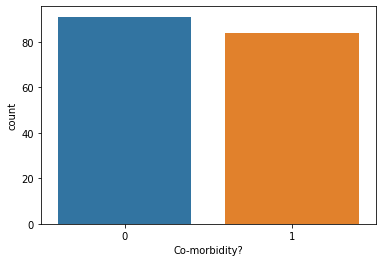

In [54]:
sns.countplot(df['Co-morbidity?'])

In [55]:
df_com = df[['Co-morbidity?','Outcome']]
c_com = contingency(df_com,'Co-morbidity?')
c_com

size    
Outcome        0.0 1.0
Co-morbidity?         
0               85   6
1               66  18

In [56]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_com))
chi2, p

(6.9184315213392225, 0.008531177088585248)

From this, we can see that patients without comorbidities are less likely to have a fatal outcome. This can be an indicator in our model.

#### Diabetes
(description)

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Diabetes', ylabel='count'>

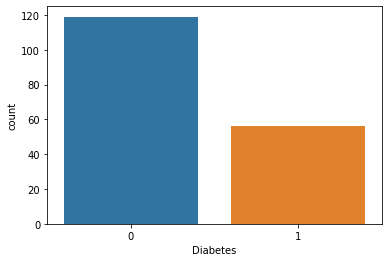

In [57]:
sns.countplot(df['Diabetes'])

In [58]:
df_Diabetes = df[['Diabetes','Outcome']]
c_diabetes = contingency(df_Diabetes,'Diabetes')
c_diabetes

size    
Outcome   0.0 1.0
Diabetes         
0         106  13
1          45  11

##### Chi-sqaured test for diabetes dependency on the outcome

In [59]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_diabetes))
chi2, p

(1.7647743596610828, 0.18403011762049343)

Since the p-value < 5%, we can conclude that there is a dependency of diabetes on the final outcome.

#### Hypertension
(description)

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Hypertension', ylabel='count'>

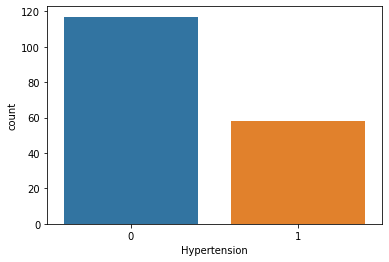

In [60]:
sns.countplot(df['Hypertension'])

In [61]:
df_hp = df[['Hypertension','Outcome']]
c_hp = contingency(df_hp,'Hypertension')
c_hp

size    
Outcome       0.0 1.0
Hypertension         
0             106  11
1              45  13

##### Chi-squared exact test for hypertension dependency on the outcome

In [62]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_hp))
chi2, p

(4.503149572568246, 0.033832483634858655)

Since the p-value < 5%, we can conclude that there is a dependency of Hypertension on the final outcome.

#### Heart Conditions
(description)

/home/shikha/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Heart Condition', ylabel='count'>

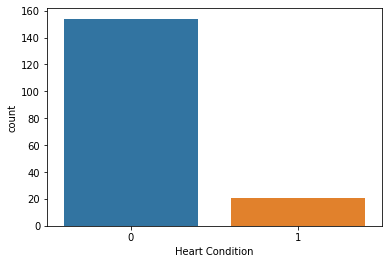

In [63]:
sns.countplot(df['Heart Condition'])

In [64]:
df_heart = df[['Heart Condition','Outcome']]
c_heart = contingency(df_heart,'Heart Condition')
c_heart

size    
Outcome          0.0 1.0
Heart Condition         
0                135  19
1                 16   5

In [65]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(c_heart))
chi2, p

(1.2000959512341969, 0.2733025015770215)

In [66]:
grouped_com = comorbidities.groupby(['Diabetes','Hypertension','Heart Condition'],as_index=False).mean().round(2)
grouped_com

,Diabetes,Hypertension,Heart Condition,Outcome
0,0,0,0,0.08
1,0,0,1,0.00
2,0,1,0,0.28
3,0,1,1,0.17
4,1,0,0,0.16
5,1,0,1,0.33
6,1,1,0,0.17
7,1,1,1,0.30


In [67]:
grouped_com = comorbidities.groupby(['Diabetes','Hypertension','Heart Condition'],as_index=False).size()
grouped_com

,Diabetes,Hypertension,Heart Condition,size
0,0,0,0,93
1,0,0,1,2
2,0,1,0,18
3,0,1,1,6
4,1,0,0,19
5,1,0,1,3
6,1,1,0,24
7,1,1,1,10


## Blood 
(description)

In [68]:
blood = df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','LACTATE DEHYDROGENASE4','C-REACTIVE PROTEINS','ERYTHROCYTE SEDIMENTATION RATE','PRO-CALCITONIN','D-DIMER','IL-6','SERUM FERRITIN','Outcome']]

In [69]:
blood

,HEMOGLOBIN,TLC COUNT,PLATELET COUNT,RANDOM BLOOD SUGAR,UREA,CREATININE,SODIUM,POTASSIUM,CHLORIDE,TOTAL BILIRUBIN,...,ALBUMIN,ALKALINE PHOSPHATASE,LACTATE DEHYDROGENASE4,C-REACTIVE PROTEINS,ERYTHROCYTE SEDIMENTATION RATE,PRO-CALCITONIN,D-DIMER,IL-6,SERUM FERRITIN,Outcome
0,15.9,6200.0,127000.0,121.0,47.5,1.3,143.0,4.8,108.0,0.5,...,3.8,44.1,933.0,58.10,8.0,NaN,98,NaN,NaN,0.0
1,13.4,4140.0,188000.0,96.0,21.8,1.0,148.0,4.1,108.0,0.3,...,3.9,58.5,467.0,3.66,NaN,NaN,0.2,NaN,NaN,0.0
2,15.9,4680.0,231000.0,102.0,18.3,5800.0,159.0,18.1,1.1,0.8,...,4.2,86.0,499.0,10.17,4.0,0.20,0.35,NaN,NaN,0.0
3,13.2,5200.0,234000.0,119.0,36.6,0.9,140.0,4.2,104.0,2.4,...,3.7,120.0,94.9,168.90,NaN,NaN,NaN,63.31,NaN,1.0
4,13.7,9500.0,321000.0,92.0,22.0,0.9,124.0,3.8,92.0,4.2,...,3.1,177.0,456.0,164.00,8.0,NaN,350.55,4.33,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,18.2,6700.0,101000.0,200.0,54.1,0.9,136.0,2.9,97.0,1.4,...,3.7,73.3,1452.0,127.60,14.0,NaN,410,NaN,NaN,1.0
186,13.9,6800.0,156000.0,151.0,59.6,1.9,141.0,4.2,106.0,0.5,...,3.8,57.4,483.0,138.15,6.0,NaN,1120,37.90,NaN,1.0
187,14.9,8900.0,1820000.0,189.0,25.2,1.1,137.0,4.2,106.0,1.8,...,3.3,60.1,3250.0,143.00,8.0,0.54,1078,735.60,NaN,1.0
188,11.2,12000.0,124000.0,210.0,43.2,1.3,132.0,3.8,110.0,1.2,...,3.4,216.0,324.0,124.00,6.0,NaN,1224,NaN,NaN,1.0


### Dealing with Missing values

The columns IL-6, D-DIMER, SERUM FERTININ, PRO CALCITONIN, ERYTHROCYTE SEDIMENTATION RATE, LACTATE DEHYDROGENASE4 Have too mnay null values for us to make any useful assumptions from them. Thus we will drop these columns.

All other columns have approximately 10 null values from the same patients, so we shall drop those rows.

In [70]:
#dropping columns
df.drop(columns=['IL-6', 'D-DIMER', 'SERUM FERRITIN', 'PRO-CALCITONIN', 'ERYTHROCYTE SEDIMENTATION RATE', 'LACTATE DEHYDROGENASE4'],inplace=True)
#dropping NA values
df.dropna(subset=['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS'],axis=0,inplace=True)

In [71]:
blood = df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS']]
missing_data = blood.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

HEMOGLOBIN
False    175
Name: HEMOGLOBIN, dtype: int64

TLC COUNT
False    175
Name: TLC COUNT, dtype: int64

PLATELET COUNT
False    175
Name: PLATELET COUNT, dtype: int64

RANDOM BLOOD SUGAR
False    175
Name: RANDOM BLOOD SUGAR, dtype: int64

UREA
False    175
Name: UREA, dtype: int64

CREATININE
False    175
Name: CREATININE, dtype: int64

SODIUM
False    175
Name: SODIUM, dtype: int64

POTASSIUM
False    175
Name: POTASSIUM, dtype: int64

CHLORIDE
False    175
Name: CHLORIDE, dtype: int64

TOTAL BILIRUBIN
False    175
Name: TOTAL BILIRUBIN, dtype: int64

DIRECT BILIRUBIN
False    175
Name: DIRECT BILIRUBIN, dtype: int64

SGOT
False    175
Name: SGOT, dtype: int64

SGPT
False    175
Name: SGPT, dtype: int64

TOTAL PROTEINS
False    175
Name: TOTAL PROTEINS, dtype: int64

ALBUMIN
False    175
Name: ALBUMIN, dtype: int64

ALKALINE PHOSPHATASE
False    175
Name: ALKALINE PHOSPHATASE, dtype: int64

C-REACTIVE PROTEINS
False    175
Name: C-REACTIVE PROTEINS, dtype: int64



Now there are no missing values in our data.
We have 178 patients data, and now we can analyse how their blood factors are affecting the ventilatory support.

### Normalizing Data

### Understanding the Features

<Figure size 7200x7200 with 0 Axes>

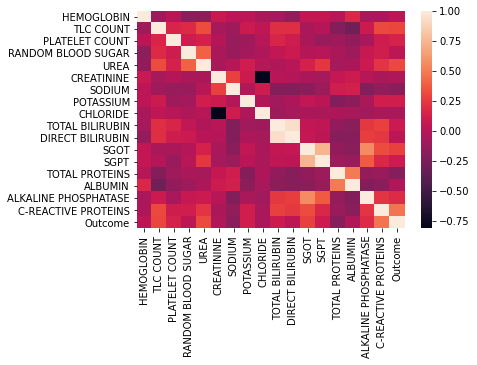

<Figure size 7200x7200 with 0 Axes>

In [74]:
blood = df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS','Outcome']] 
sns.heatmap(blood.corr())
plt.figure(figsize = (100,100))

<AxesSubplot:xlabel='Outcome', ylabel='C-REACTIVE PROTEINS'>

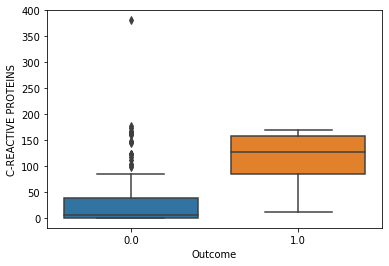

In [75]:
sns.boxplot(x="Outcome", y="C-REACTIVE PROTEINS", data=blood)

In [ ]:
sns.boxplot(x="Outcome", y="SODIUM", data=blood)

In [ ]:
sns.boxplot(x="Outcome", y="SGOT", data=blood)

In [ ]:
sns.boxplot(x="Outcome", y="UREA", data=blood)

In [ ]:
sns.boxplot(x="Outcome", y="TLC COUNT", data=blood)

In [ ]:
sns.boxplot(x="Outcome", y="ALKALINE PHOSPHATASE", data=blood)

In [ ]:
sns.boxplot(x="Outcome", y="POTASSIUM", data=blood)

In [ ]:
sns.boxplot(x="Outcome", y="PLATELET COUNT", data=blood)

From the analysis above, we see that the factors 'C-REACTIVE PROTEINS','UREA','SODIUM','TOTAL PROTEINS' and 'SGOT' may have some predictive value for the outcome of the disease.

In [ ]:
measure = df[["Gender", "Outcome","TLC COUNT"]]
grouped = measure.groupby(['Gender','Outcome'],as_index=False).mean()
grouped_pivot = grouped.pivot(index='Gender',columns='Outcome')
grouped_pivot

In [ ]:
measure = df.query("Outcome==1")[["Gender","TLC COUNT","HEMOGLOBIN","UREA","C-REACTIVE PROTEINS"]]
sns.heatmap(measure.corr(),annot=True)
plt.figure(figsize = (100,100))

In [ ]:
chi2, p, dof, ex = scipy.stats.chi2_contingency(np.array(grouped_pivot))
chi2, p

In [ ]:
columns = ['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS']
blood = df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS']] 
pearsonoutcome = []
outcome = np.array(df['Outcome'])
for i in blood.columns:
    pearsonoutcome.append(scipy.stats.pearsonr(np.array(df[i]), outcome)[0]) 
sns.heatmap(pd.DataFrame(pearsonoutcome,columns),annot=True)
plt.figure()

## Tests

1. qSOFA score
2. CORADS Score on HRCT

In [ ]:
df_qSOFA = df[['qSOFA SCORE','Outcome']]
c_qSOFA = contingency(df_qSOFA,'qSOFA SCORE')
c_qSOFA

In [ ]:
df['CORADS SCORE ON HRCT'].replace('normal',2,inplace=True)
df_corads = df[['CORADS SCORE ON HRCT','Outcome']]
c_corads = contingency(df_corads,'CORADS SCORE ON HRCT')
c_corads

One factor could be if the CORADS Score on HRCT is above 6. 

In [ ]:
corads_groups = [0,5,6]
group_names = [0,1]
df = plot_count('CORADS 6','CORADS SCORE ON HRCT',corads_groups,group_names)

In [77]:
scipy.stats.pointbiserialr(df['Outcome'],df['C-REACTIVE PROTEINS'])

PointbiserialrResult(correlation=0.472893752287284, pvalue=3.893275765373262e-11)

In [78]:
scipy.stats.pointbiserialr(df['Outcome'],df['UREA'])

PointbiserialrResult(correlation=0.3117064304171466, pvalue=2.6805506711561495e-05)

In [79]:
scipy.stats.pointbiserialr(df['Outcome'],df['TLC COUNT'])

PointbiserialrResult(correlation=0.30439476232310986, pvalue=4.212188070385344e-05)

In [81]:
scipy.stats.pointbiserialr(df['Outcome'],df['SODIUM'])

PointbiserialrResult(correlation=-0.1783901613784831, pvalue=0.018179304860517262)

In [82]:
scipy.stats.pointbiserialr(df['Outcome'],df['POTASSIUM'])

PointbiserialrResult(correlation=0.11864957119709095, pvalue=0.1178487429919925)

In [83]:
scipy.stats.pointbiserialr(df['Outcome'],df['HEMOGLOBIN'])

PointbiserialrResult(correlation=0.0309687054569618, pvalue=0.6841261333271086)

In [84]:
scipy.stats.pointbiserialr(df['Outcome'],df['PLATELET COUNT'])

PointbiserialrResult(correlation=0.14671314875795136, pvalue=0.05269396000439196)

In [85]:
scipy.stats.pointbiserialr(df['Outcome'],df['CREATININE'])

PointbiserialrResult(correlation=-0.02948197680523263, pvalue=0.6985347753381967)

In [86]:
scipy.stats.pointbiserialr(df['Outcome'],df['TOTAL BILIRUBIN'])

PointbiserialrResult(correlation=0.09356839495311253, pvalue=0.21808849835810593)

In [87]:
scipy.stats.pointbiserialr(df['Outcome'],df['CHLORIDE'])

PointbiserialrResult(correlation=-0.060385458404237355, pvalue=0.4272975772317907)

In [88]:
scipy.stats.pointbiserialr(df['Outcome'],df['ALBUMIN'])

PointbiserialrResult(correlation=-0.022651382956557976, pvalue=0.7660539751609032)

In [89]:
scipy.stats.pointbiserialr(df['Outcome'],df['SGOT'])

PointbiserialrResult(correlation=0.28232528988800476, pvalue=0.00015349414730621736)

In [90]:
scipy.stats.pointbiserialr(df['Outcome'],df['SGPT'])

PointbiserialrResult(correlation=0.10043734065309715, pvalue=0.18600636738358176)

In [91]:
scipy.stats.pointbiserialr(df['Outcome'],df['ALKALINE PHOSPHATASE'])

PointbiserialrResult(correlation=0.18785683904932488, pvalue=0.012792008482385313)

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']] = scaler.fit_transform(df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']])
df[['Age','BMI','Temp','SPO2','Respiratory rate(breaths per minute)','RANDOM BLOOD SUGAR']]

,Age,BMI,Temp,SPO2,Respiratory rate(breaths per minute),RANDOM BLOOD SUGAR
0,0.551724,0.436782,0.174603,0.833333,0.3,0.131285
1,0.241379,0.804598,0.476190,0.666667,0.1,0.061453
2,0.264368,0.402299,0.428571,0.666667,0.1,0.078212
3,0.781609,0.321839,0.365079,0.666667,0.6,0.125698
4,0.505747,1.000000,0.841270,0.666667,0.3,0.050279
...,...,...,...,...,...,...
185,0.551724,0.977011,0.507937,0.333333,0.7,0.351955
186,0.321839,0.839080,0.571429,0.666667,0.7,0.215084
187,0.747126,0.310345,0.412698,0.833333,0.3,0.321229
188,0.689655,0.425287,0.507937,0.500000,0.9,0.379888


In [94]:
blood = df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS']]

df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS']].astype('float')
# scaler = MinMaxScaler()
df[['HEMOGLOBIN','TLC COUNT','PLATELET COUNT','RANDOM BLOOD SUGAR','UREA','CREATININE','SODIUM','POTASSIUM','CHLORIDE','TOTAL BILIRUBIN','DIRECT BILIRUBIN','SGOT','SGPT','TOTAL PROTEINS','ALBUMIN','ALKALINE PHOSPHATASE','C-REACTIVE PROTEINS']] = scaler.fit_transform(blood)

In [95]:
df.to_csv('clean_df.csv')